## Naming Data

### Import Data

In [11]:
%pylab inline
import pandas as pd

years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']
for year in years:
    path = '../../../pydata/ch02/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)
    
# use concat to connect multiple files into a dataframe
names = pd.concat(pieces, ignore_index = True)


Populating the interactive namespace from numpy and matplotlib


### Pivot

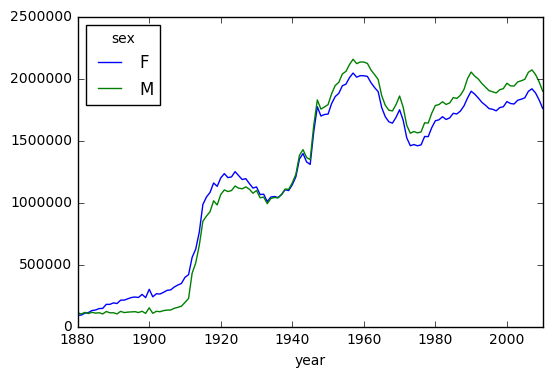

In [13]:
# total births sum by year
total_births = pd.pivot_table(names, values='births', index='year', columns='sex', aggfunc='sum')
total_births.tail()

# can perform plot directly from result
total_births.plot()

In [16]:
# custom fun for each group with apply
# for ex, colculate proportion for each group
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

### Naming Trand

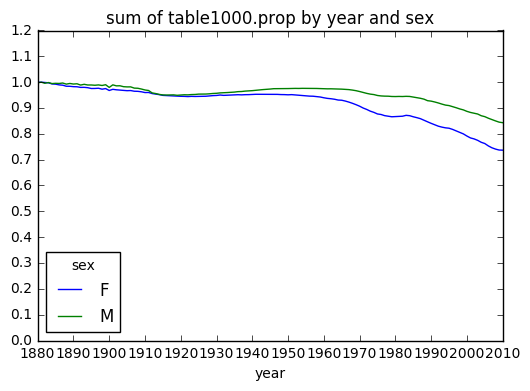

In [41]:
import numpy as np
# get top 1000 names in specific grouping to reduce size 

def get_top1000(group):
    return group.sort_values(by = 'births', ascending=False)[:1000]

# note groupby must follow by apply 
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by = 'births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

table = pd.pivot_table(top1000, values='prop', index='year', columns='sex', aggfunc='sum')

table.plot(title='sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

# the proportion for top 1000 names is decreasing which means the diversity of name is increasing overtime. 

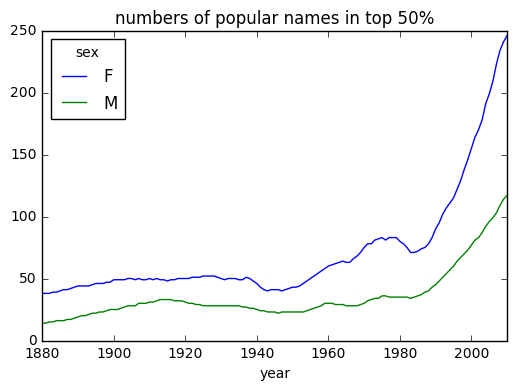

In [63]:
# get quantile 
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    # do a cumulative sum and search for data point of 0.5(50%)
    return group.prop.cumsum().searchsorted(q)+1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

diversity.M = diversity.M.astype('int')
diversity.F = diversity.F.astype('int')
# plot
diversity.plot(title='numbers of popular names in top 50%')
# so the girls' naming diversity is much higher than boys